In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train = X_train/255
X_test = X_test/255

In [5]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

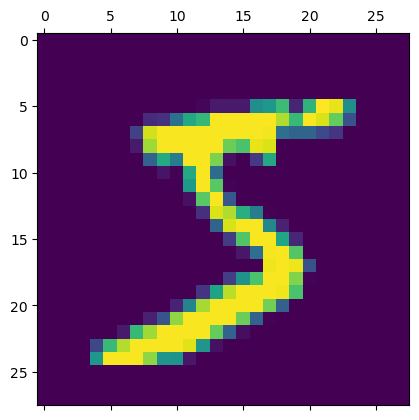

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

X_test_flattened.shape

(10000, 784)

In [9]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
model = Sequential(
    [   
        tf.keras.Input(shape=(784,)),
        Dense(units = 100, activation = 'relu'),
        Dense(units = 10, activation = 'sigmoid')

    ]
)

In [11]:
model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2779 - accuracy: 0.9201
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1283 - accuracy: 0.9625
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0888 - accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0677 - accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0535 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0426 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0348 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0288 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0234 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [12]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0865 - accuracy: 0.9764


[0.08653514087200165, 0.9764000177383423]

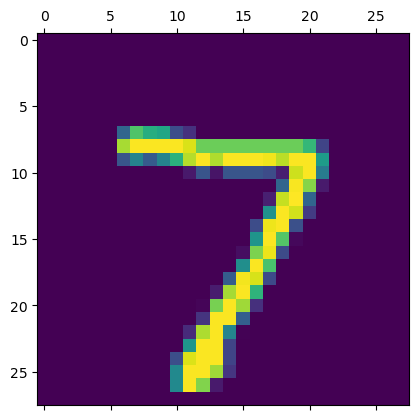

In [13]:
plt.matshow(X_test[0])

In [14]:
y_predicted = model.predict(X_test_flattened)
y_test[:5]

313/313 [==============================] - 1s 1ms/step


array([7, 2, 1, 0, 4], dtype=uint8)

In [15]:
y_p = [np.argmax(i) for i in y_predicted]
y_p[:5]

[7, 2, 1, 0, 4]

In [16]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_p)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    4,    1,    0,    4,    1,    1,    2,    0],
       [   0, 1124,    3,    0,    0,    2,    2,    0,    4,    0],
       [   6,    2, 1012,    3,    0,    1,    3,    3,    2,    0],
       [   1,    0,    7,  990,    0,    3,    0,    3,    5,    1],
       [   3,    1,    1,    1,  952,    1,    6,    0,    1,   16],
       [   1,    2,    0,   15,    1,  861,    2,    1,    6,    3],
       [   6,    3,    2,    1,    1,    6,  939,    0,    0,    0],
       [   0,    6,   13,    6,    4,    0,    0,  988,    3,    8],
       [   1,    1,    3,    4,    5,    4,    4,    1,  947,    4],
       [   2,    1,    0,    7,    5,    2,    1,    5,    2,  984]])>

Text(95.72222222222221, 0.5, 'Truth')

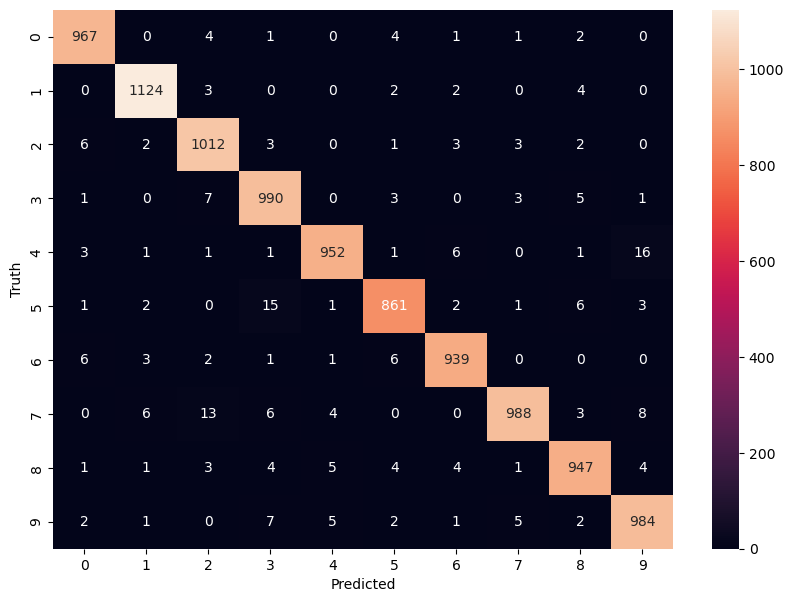

In [17]:
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')